In [56]:
import numpy as np
import matplotlib.pyplot as plt

4 вариант

In [57]:
# Задаем точки
P = np.array([[7.41, 0.36],
             [6.82, 2.06],
             [5.99, 2.88],
             [4.27, 3.17],
             [2.57, 3.29],
             [1.62, 1.8]])

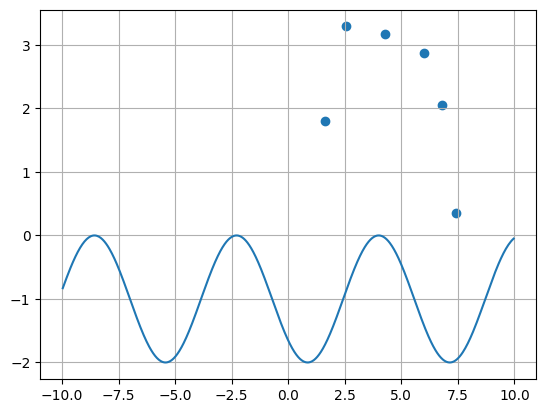

In [58]:
# y - cos(x-4) + 1 = 0

# Задаем интервал и задаем параметрически X и Y
T = np.linspace(-np.pi / 2 + 10 ** (-1), np.pi / 2 - 10 ** (-1), num = 5000)
X = np.tan(T)
Y = np.cos(X - 4) - 1 

plt.scatter(P[:,0], P[:,1])
plt.plot(X, Y)

plt.grid()
plt.show()

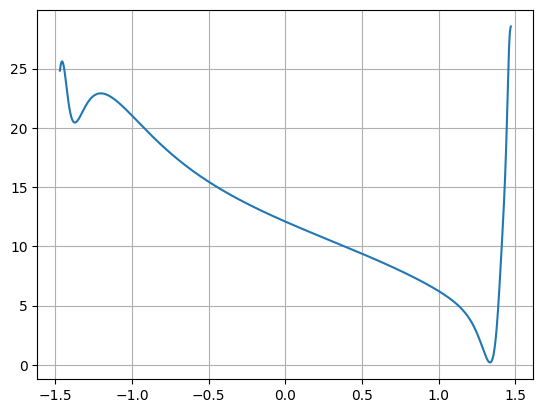

array([24.83213725, 24.89096166, 24.9483367 , ..., 28.50506954,
       28.53248703, 28.55641632])

In [59]:
R = np.zeros((len(X),6))
r = np.zeros(len(X))
sum_kv = np.zeros(len(X))

for j in range(len(X)):
    sum_kv[j] = 0
    for i in range(6):
        R[j,i] = ((X[j] - P[i,0]) ** 2 + (Y[j] - P[i,1]) ** 2) ** 0.5
    r[j] = np.mean(R[j,:])
    for i in range(6):
        sum_kv[j] += (R[j,i] - r[j]) ** 2
plt.plot(T,sum_kv)

plt.grid()
plt.show()
sum_kv

In [60]:
# Метод золотого сечения
def golden_section_search(f, a, b, tol=1e-5):
    phi = (1 + np.sqrt(5)) / 2  # Золотое сечение
    resphi = 2 - phi

    x1 = a + resphi * (b - a)
    x2 = b - resphi * (b - a)
    f1 = f(x1)
    f2 = f(x2)

    while abs(b - a) > tol:
        if f1 < f2:
            b = x2
            x2 = x1
            f2 = f1
            x1 = a + resphi * (b - a)
            f1 = f(x1)
        else:
            a = x1
            x1 = x2
            f1 = f2
            x2 = b - resphi * (b - a)
            f2 = f(x2)
    
    return (a + b) / 2

# Функция для поиска минимума суммы квадратов отклонений
def f(t_index):
    return sum_kv[int(t_index)]

# Применяем метод золотого сечения на интервале индексов
min_index = golden_section_search(f, 0, len(T) - 1)
min_index = int(min_index)

# Минимум суммы квадратов отклонений
min_sum_kv = sum_kv[min_index]

# Координаты центра окружности
center_x = X[min_index]
center_y = Y[min_index]
radius = r[min_index]

print(f"Координаты центра окружности: ({center_x}, {center_y})")
print(f"Радиус окружности: {radius}")

Координаты центра окружности: (4.170427485826809, -0.014487646199524029)
Радиус окружности: 3.338806882682121


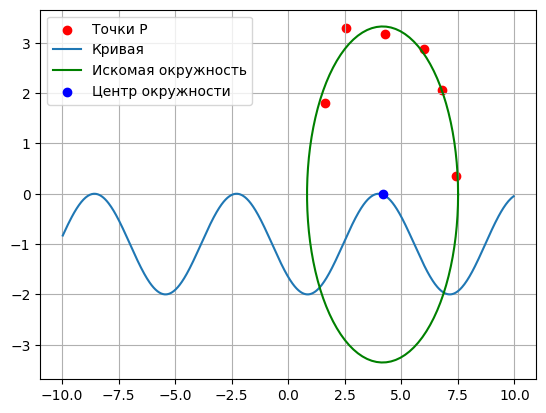

In [61]:
# Построение окружности
theta = np.linspace(0, 2 * np.pi, 100)
circle_x = center_x + radius * np.cos(theta)
circle_y = center_y + radius * np.sin(theta)

# График кривой, точек P, окружности и центра окружности
plt.scatter(P[:, 0], P[:, 1], color='red', label='Точки P')
plt.plot(X, Y, label='Кривая')
plt.plot(circle_x, circle_y, label='Искомая окружность', color='green')
plt.scatter(center_x, center_y, color='blue', marker='o', label='Центр окружности', zorder=5)

plt.grid()
plt.legend()
plt.show()
